In [39]:
import os
import pandas as pd
import numpy as np
import json
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
cards = pd.read_csv("../data/cards_data.csv")
users = pd.read_csv("../data/users_data.csv")
transactions = pd.read_csv("../data/transactions_data.csv")

In [3]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [4]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [5]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN


In [6]:
def money_to_float(s):
    s = pd.Series(s).astype(str).str.strip()
    s = s.str.replace(r'[$,]', '', regex=True)   
    return pd.to_numeric(s)   

def parse_mmYYYY(s):
    return pd.to_datetime(pd.Series(s).astype(str), format="%m/%Y")

In [7]:
# users: 화폐형 컬럼 숫자화, 불필요(PII) 최소 제거
for c in ["per_capita_income","yearly_income","total_debt"]:
    if c in users.columns:
        users[c] = money_to_float(users[c])
        
users = users.drop("address", axis=1) 

# 카드 숫자/날짜 변환
cards["credit_limit"] = money_to_float(cards["credit_limit"])
cards["acct_open_date"] = parse_mmYYYY(cards["acct_open_date"])
cards["expires"] = parse_mmYYYY(cards["expires"]) # datime 형태로 변환

# 카드 has_chaip, card_on_dark_web 정보 이진화
for c in ["has_chip","card_on_dark_web"]:
    cards[c] = cards[c].map({"YES":1,"Yes":1,"NO":0,"No":0}).astype('Int8')

# 카드 민감정보 제거
cards = cards.drop(["card_number", "cvv"], axis=1)

# transactions: 날짜/금액/파생
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["hour"] = transactions["date"].dt.hour
transactions["dow"]  = transactions["date"].dt.dayofweek

# 음수(환불 등)는 분석 목적에 따라 분리
transactions["amount"] = money_to_float(transactions["amount"])
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_log1p"] = np.log1p(transactions["amount_pos"])

transactions["is_refund"] = (transactions["amount"] < 0).astype('Int8')
transactions["amount_pos"] = transactions["amount"].clip(lower=0)
transactions["amount_neg"] = transactions["amount"].clip(upper=0) 

# 우편번호 float → 문자열 5자리
transactions["zip"] = transactions["zip"].round().astype('Int64')
transactions["zip_str"] = transactions["zip"].astype("string").str.zfill(5)

# 거의 전부 NaN인 errors 컬럼 제거
transactions = transactions.drop("errors", axis=1) 

In [8]:
work = pd.merge(transactions, users, left_on='client_id', right_on='id', how='left', suffixes=('', '__USER'))
work = pd.merge(work, cards, left_on='card_id', right_on='id', how='left', suffixes=('', '__CARD'))

In [9]:
work.drop(columns=['id__USER', 'id__CARD'], inplace=True, errors='ignore') # 중복 ID 컬럼 삭제

In [10]:
# 1. JSON 파일 불러오기
fraud_label_file_path = '../data/train_fraud_labels.json'

with open(fraud_label_file_path, 'r') as f:
    data = json.load(f)

# 2. target 딕셔너리 추출
target_dict = data['target']

In [11]:
# 'is_raud'에 target 값들 입력
work['is_fraud'] = work['id'].astype(str).map(target_dict)
work['is_fraud'] = work['is_fraud'].map({'No': 0, 'Yes': 1}).astype('Int8') # Yes를 1로 No를 0으로

# fraud_label null일 경우 0으로.
work_with_target = work.fillna(0)

In [12]:
##################################################
filepath = '../data/transactions_wtih_target.csv' # ********* 이부분은 본인이 저장하고 싶은 경로 + 파일명 사용!! *******
#################################################


if not os.path.exists(filepath):   # 파일 없을 때만 저장
    work_with_target.to_csv(filepath, index=False)
else:
    print(f'⚠️ 파일 이미 존재: {filepath}, 저장 스킵')

## EDA - amount가 음수인 사기거래 

In [57]:
# 사기거래의 경우 환불이 된 경우가 있을 수 있다. 금액이 음수인 경우를 추적해보자
work_with_target[(work_with_target.amount_neg !=0) & (work_with_target.is_fraud != 0)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1
96147,7590192,2010-01-30 12:44:00,1019,5112,-450.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Credit,2023-11-01,1,1,7300,2008-10-01,2010,0,1
108042,7604364,2010-02-03 00:01:00,771,4986,-138.0,Online Transaction,74934,ONLINE,0,0,...,Mastercard,Debit,2023-01-01,1,2,17536,2003-10-01,2010,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080437,23483325,2019-09-02 14:55:00,74,4027,-301.0,Chip Transaction,59474,Rome,Italy,0,...,Visa,Debit,2022-06-01,1,1,19746,2014-07-01,2014,0,1
13098338,23505312,2019-09-07 11:06:00,1,4652,-367.0,Swipe Transaction,7777,Rome,Italy,0,...,Visa,Credit,2021-12-01,0,1,12800,2007-09-01,2011,0,1
13178843,23604739,2019-09-28 12:25:00,944,372,-69.0,Chip Transaction,61195,Rome,Italy,0,...,Mastercard,Debit,2020-05-01,1,2,72274,2018-01-01,2018,0,1
13281619,23731814,2019-10-25 13:41:00,1843,5834,-382.0,Chip Transaction,32070,Rome,Italy,0,...,Mastercard,Credit,2021-10-01,1,2,4800,2005-12-01,2009,0,1


In [54]:
work_with_target[(work_with_target.client_id == 126) & (abs(work_with_target.amount) == 339)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
9526,7486725,2010-01-03 20:58:00,126,5497,339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1
22642,7502469,2010-01-07 19:26:00,126,5497,-339.0,Online Transaction,3558,ONLINE,0,0,...,Mastercard,Debit,2023-04-01,1,1,13555,2007-11-01,2011,0,1


In [59]:
work_with_target[(work_with_target.client_id == 1600) & (abs(work_with_target.amount) == 104)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
32204,7513871,2010-01-10 19:44:00,1600,5050,104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
41604,7525132,2010-01-13 15:43:00,1600,5050,-104.0,Online Transaction,39991,ONLINE,0,0,...,Mastercard,Debit,2021-05-01,1,2,22446,2006-10-01,2012,0,1
2127995,10045432,2011-09-09 17:53:00,1600,4251,104.0,Swipe Transaction,59474,Belfair,WA,98528,...,Mastercard,Debit,2023-08-01,1,1,48754,2008-08-01,2013,0,0
2134935,10053867,2011-09-11 19:48:00,1600,4251,-104.0,Swipe Transaction,59474,Belfair,WA,98528,...,Mastercard,Debit,2023-08-01,1,1,48754,2008-08-01,2013,0,0


In [58]:
work_with_target[(work_with_target.client_id == 1048) & (abs(work_with_target.amount) == 437)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
71664,7560966,2010-01-22 23:31:00,1048,2542,437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1
74531,7564371,2010-01-23 21:33:00,1048,2542,-437.0,Online Transaction,59474,ONLINE,0,0,...,Mastercard,Debit,2014-06-01,1,2,22527,2007-04-01,2011,0,1


In [60]:
work_with_target[(work_with_target.client_id == 345) & (abs(work_with_target.amount) == 210)]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
13282707,23733174,2019-10-25 18:53:00,345,3441,210.0,Chip Transaction,49637,Rome,Italy,0,...,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,0,1
13289605,23741689,2019-10-27 14:49:00,345,3441,-210.0,Chip Transaction,49637,Rome,Italy,0,...,Visa,Credit,2024-09-01,1,3,7900,2009-06-01,2009,0,1


- 사기 거래 금액이 음수인 경우는 환불된 경우
- 사기거래 count 집계시 중복 집계(사기 거래 피해 + 사기거래 환불로)
- 사기거래 집계에 사용할 거래내역은 금액이 양수인 경우만으로 한정해야한다.

In [73]:
# work_with_target 데이터에서 amount가 음수면서 is_faud는 1인 경우 제외
condition = ~((work_with_target.amount_neg != 0) & (work_with_target.is_fraud != 0))
work_with_target_pos = work_with_target[condition]

# 고객 id별 fraud_count (양수 금액 + 사기)
fraud_counts_pos = (
    work_with_target_pos.groupby('client_id')['is_fraud']
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [66]:
# amount < 0 인 일반 거래는 여전히 dataframe에 남아있음.
work_with_target_pos[work_with_target_pos.amount < 0]

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,-77.0,Swipe Transaction,59935,Beulah,ND,58523,...,Mastercard,Debit (Prepaid),2022-07-01,1,2,55,2008-05-01,2008,0,0
19,7475347,2010-01-01 00:36:00,114,3398,-64.0,Swipe Transaction,61195,North Hollywood,CA,91606,...,Mastercard,Debit,2023-07-01,1,2,27447,2008-06-01,2010,0,0
50,7475382,2010-01-01 01:25:00,1703,2969,-78.0,Swipe Transaction,43293,Grand Junction,CO,81506,...,Mastercard,Credit,2022-06-01,1,2,10600,2008-05-01,2019,0,0
81,7475422,2010-01-01 02:13:00,1453,1117,-460.0,Swipe Transaction,5009,Middletown,NY,10940,...,Mastercard,Debit,2024-11-01,1,1,14561,2007-02-01,2015,0,0
114,7475460,2010-01-01 03:08:00,957,4532,-147.0,Swipe Transaction,44795,Marysville,OH,43040,...,Mastercard,Debit,2020-06-01,0,1,27974,2003-09-01,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305780,23761706,2019-10-31 22:13:00,1360,143,-91.0,Chip Transaction,59935,Crestview,FL,32536,...,Visa,Credit,2020-08-01,1,1,9000,2007-01-01,2007,0,0
13305811,23761745,2019-10-31 22:28:00,194,5587,-71.0,Swipe Transaction,59935,Hartford City,IN,47348,...,Visa,Debit,2023-03-01,0,2,9080,2009-11-01,2013,0,0
13305813,23761747,2019-10-31 22:29:00,133,4683,-52.0,Chip Transaction,61195,Marietta,GA,30067,...,Mastercard,Debit,2024-03-01,1,1,25197,2008-09-01,2011,0,0
13305820,23761757,2019-10-31 22:35:00,260,323,-77.0,Chip Transaction,22204,Mission,TX,78572,...,Visa,Debit,2021-12-01,1,1,13342,2013-01-01,2013,0,0


In [74]:
# 고객 id별 fraud_count (양수 금액 + 음수 금액 + 사기)
fraud_counts_all = (
    work_with_target.groupby('client_id')['is_fraud'] # work_with_target은 음수의 사기거래 금액도 포함
    .sum()  # 고객별 사기 피해 건수
    .reset_index(name='fraud_count')
)

In [63]:
fraud_counts

,client_id,fraud_count
0,0,6
1,1,12
2,2,3
3,3,17
4,4,17
...,...,...
1214,1994,24
1215,1995,10
1216,1996,12
1217,1997,5


In [67]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1


In [79]:
# 양수 사기 금액만 포함한 경우
users_with_fraud_count_pos = pd.merge(users, fraud_counts_pos, left_on='id', right_on='client_id', how='left')
users_with_fraud_count_pos.drop(columns='client_id', inplace=True, errors=True)

In [80]:
# 음수 사기 금액도 포함한 경우
users_with_fraud_count = pd.merge(users, fraud_counts_all, left_on='id', right_on='client_id', how='left')
users_with_fraud_count.drop(columns='client_id', inplace=True, errors=True)

In [93]:
# users 데이터에 fraud_count 추가 완료 확인
users_with_fraud_count_pos.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_count
0,825,53,66,1966,11,Female,34.15,-117.76,29278,59696,127613,787,5,9
1,1746,53,68,1966,12,Female,40.76,-73.74,37891,77254,191349,701,5,21
2,1718,81,67,1938,11,Female,34.02,-117.89,22681,33483,196,698,5,30
3,708,63,63,1957,1,Female,40.71,-73.99,163145,249925,202328,722,4,8
4,1164,43,70,1976,9,Male,37.76,-122.44,53797,109687,183855,675,1,0


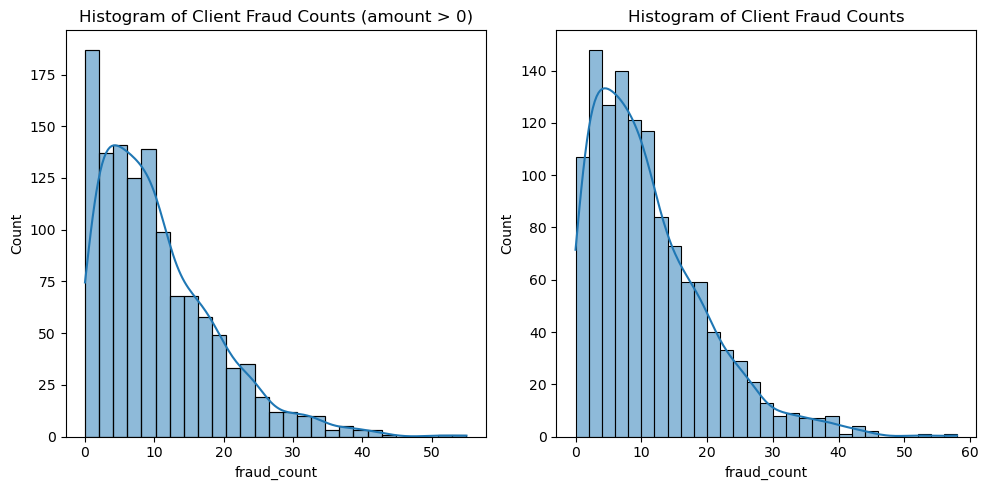

In [114]:
plt.figure(figsize=(10, 5)) 

# amount 양수만
plt.subplot(121)  # 1행 2열 중 1번째
sns.histplot(users_with_fraud_count_pos.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts (amount > 0)')

# amount 음수도 포함
plt.subplot(122)  # 1행 2열 중 2번째
sns.histplot(users_with_fraud_count.fraud_count, kde=True)
plt.title('Histogram of Client Fraud Counts')

plt.tight_layout()
plt.show()

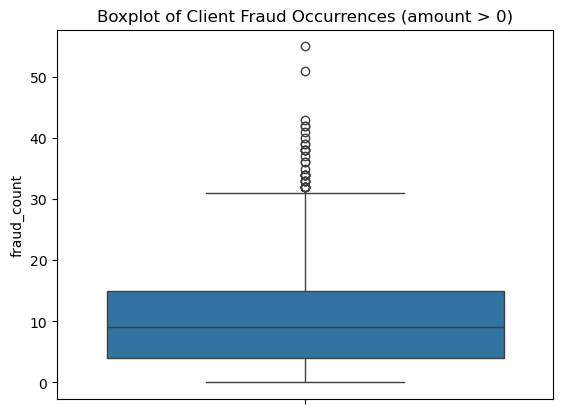

In [115]:
sns.boxplot(users_with_fraud_count_pos.fraud_count)
plt.title('Boxplot of Client Fraud Occurrences (amount > 0)')
plt.show()

In [36]:
users_with_fraud_count.fraud_count.describe()

count       1219.0
mean     10.936833
std       8.698571
min            0.0
25%            4.0
50%            9.0
75%           15.0
max           58.0
Name: fraud_count, dtype: Float64

In [94]:
users_with_fraud_count_pos.isna().sum()

id                     0
current_age            0
retirement_age         0
birth_year             0
birth_month            0
gender                 0
latitude               0
longitude              0
per_capita_income      0
yearly_income          0
total_debt             0
credit_score           0
num_credit_cards       0
fraud_count          781
dtype: int64

In [100]:
len(users_with_fraud_count_pos) - users_with_fraud_count_pos.fraud_count.isna().sum()

np.int64(1219)

In [111]:
# 각 사기 카운트 비율
users_with_fraud_count_pos.fraud_count.value_counts().sort_index()

fraud_count
0     26
1     82
2     79
3     76
4     61
5     73
6     68
7     72
8     53
9     71
10    68
11    52
12    47
13    29
14    39
15    34
16    34
17    32
18    26
19    33
20    16
21    22
22    11
23    15
24    20
25    13
26     6
27     6
28     6
29     3
30     9
31     3
32     7
33     4
34     6
35     1
36     2
37     1
38     4
39     2
40     1
41     1
42     2
43     1
51     1
55     1
Name: count, dtype: Int64

In [112]:
# 각 사기 카운트별 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index()

fraud_count
0     0.021329
1     0.067268
2     0.064807
3     0.062346
4     0.050041
5     0.059885
6     0.055783
7     0.059065
8     0.043478
9     0.058244
10    0.055783
11    0.042658
12    0.038556
13     0.02379
14    0.031993
15    0.027892
16    0.027892
17    0.026251
18    0.021329
19    0.027071
20    0.013126
21    0.018048
22    0.009024
23    0.012305
24    0.016407
25    0.010664
26    0.004922
27    0.004922
28    0.004922
29    0.002461
30    0.007383
31    0.002461
32    0.005742
33    0.003281
34    0.004922
35     0.00082
36    0.001641
37     0.00082
38    0.003281
39    0.001641
40     0.00082
41     0.00082
42    0.001641
43     0.00082
51     0.00082
55     0.00082
Name: proportion, dtype: Float64

In [109]:
# 누적 비율
users_with_fraud_count_pos.fraud_count.value_counts(normalize=True).sort_index().cumsum()

fraud_count
0     0.021329
1     0.088597
2     0.153404
3     0.215751
4     0.265792
5     0.325677
6      0.38146
7     0.440525
8     0.484003
9     0.542248
10    0.598031
11    0.640689
12    0.679245
13    0.703035
14    0.735029
15     0.76292
16    0.790812
17    0.817063
18    0.838392
19    0.865463
20    0.878589
21    0.896637
22     0.90566
23    0.917966
24    0.934372
25    0.945037
26    0.949959
27    0.954881
28    0.959803
29    0.962264
30    0.969647
31    0.972108
32    0.977851
33    0.981132
34    0.986054
35    0.986874
36    0.988515
37    0.989336
38    0.992617
39    0.994258
40    0.995078
41    0.995898
42    0.997539
43    0.998359
51     0.99918
55         1.0
Name: proportion, dtype: Float64

만약 위험군을 나눈다면?
- 1\~5: 저 위험군 (~32%)
- 6\~11: 중 위험군 (~64%)
- 12이상: 고 위험군 (~100%)

### 제안: 고객 정보를 바탕으로 사기 위험군을 분류하는 모델을 만든다.